In [1]:
import OpenDartReader
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

api_key = '7f942045d438f45c28bc2707063b8838be98f7e6'

dart = OpenDartReader(api_key)

In [2]:
df = pd.DataFrame()

corp_name = ['대신증권']
corp_code = []

In [3]:
# rcept_no: 접수번호
# corp_cls: 법인구분 Y(유가), K(코스닥), N(코넥스), E(기타)
# corp_code: 고유번호
# corp_name: 법인명

In [4]:
df = pd.DataFrame()

for i in corp_name:
    for k in [2020,2021,2022]:
        # corp_code.append(dart.find_corp_code(i))
        temp = dart.report(i,'임원',k)
        temp['year'] = k
        df = pd.concat([df,temp])

In [5]:
df.columns = ['접수번호', '법인구분', '고유번호', '법인명', '이름', '성별', '생년월일', '직위', '등기임원여부', '상근여부', '담당업무', '주요경력', '최대주주와의관계', '재직기간', '임기만료일', '보고서연도']
df.to_csv("data/daishin_executive.csv", index = False)

In [6]:
df = pd.DataFrame()

for i in corp_name:
    for k in [2020,2021,2022]:
        temp = dart.report(i,'최대주주',k)
        temp['year'] = k
        df = pd.concat([df,temp])

In [7]:
df.columns = ['접수번호', '법인구분', '고유번호', '법인명', '주식의종류', '이름', '관계', '기초주식수', '기초주식지분율', '기말주식수', '기말주식지분율', '비고', '보고서연도']
df.to_csv("data/daishin_shareholder.csv", index = False)

In [8]:
daishin_executive = pd.read_csv('data/daishin_executive.csv', sep=",", encoding = 'UTF-8')
daishin_shareholder = pd.read_csv('data/daishin_shareholder.csv', sep=",", encoding = 'UTF-8')

In [9]:
daishin_executive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   접수번호      116 non-null    int64 
 1   법인구분      116 non-null    object
 2   고유번호      116 non-null    int64 
 3   법인명       116 non-null    object
 4   이름        116 non-null    object
 5   성별        116 non-null    object
 6   생년월일      116 non-null    object
 7   직위        116 non-null    object
 8   등기임원여부    116 non-null    object
 9   상근여부      116 non-null    object
 10  담당업무      116 non-null    object
 11  주요경력      116 non-null    object
 12  최대주주와의관계  116 non-null    object
 13  재직기간      116 non-null    object
 14  임기만료일     116 non-null    object
 15  보고서연도     116 non-null    int64 
dtypes: int64(3), object(13)
memory usage: 14.6+ KB


In [10]:
daishin_shareholder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   접수번호     48 non-null     int64  
 1   법인구분     48 non-null     object 
 2   고유번호     48 non-null     int64  
 3   법인명      48 non-null     object 
 4   주식의종류    48 non-null     object 
 5   이름       48 non-null     object 
 6   관계       42 non-null     object 
 7   기초주식수    48 non-null     object 
 8   기초주식지분율  48 non-null     float64
 9   기말주식수    48 non-null     object 
 10  기말주식지분율  48 non-null     float64
 11  비고       48 non-null     object 
 12  보고서연도    48 non-null     int64  
dtypes: float64(2), int64(3), object(8)
memory usage: 5.0+ KB


In [11]:
daishin_executive['주요경력2'] = daishin_executive['주요경력'].str.replace('\n', ' ')

daishin_executive['주요경력2']

0                                                상명여자사범대
1      성균관대 회계학 대신증권 무역센터지점장  대신증권 강남선릉센터 이사대우센터장 대신증...
2                  서울대 경제학 메리츠종금증권 심사팀장 메리츠종금증권 리스크관리본부장
3      연세대 경제학(석사) 대신증권 홍보실 이사대우실장 대신증권브랜드전략실 이사대우실장 ...
4      서강대 경제학 대신증권영업기획부장 대신증권기획실장 대신증권인재전략부 이사대우부장 대...
                             ...                        
111    서울대 법학  대검찰청 감찰부장(검사장)  서울북부지방검찰청 검사장  現)법무법인 ...
112    Florida International University 경영대학원(박사)  한국...
113    Ohio State University 정책대학원(박사)  한국조세연구원 제9대 원...
114    건국대 법학(박사)  국가청렴위원회 사무처장  제58대 법무부장관  現)재단법인 행...
115    고려대 경영학  대신증권 기획실장  대신자산운용 전무  대신증권 미래전략담당  대신...
Name: 주요경력2, Length: 116, dtype: object

In [12]:
# 학력
def getEducation(x):
    return x.split('\n')[0]

In [13]:
daishin_executive['학력'] = daishin_executive['주요경력'].apply(lambda x : getEducation(x))

In [14]:
# 대학
def getUniversity(x):
    return x.split(' ')[0]

In [15]:
daishin_executive['대학'] = daishin_executive['주요경력2'].apply(lambda x : getUniversity(x))

In [16]:
# 전공
def getMajor(x):
    try:
        return x.split(' ')[1]
    except IndexError:
        return 'N'

In [17]:
daishin_executive['전공'] = daishin_executive['주요경력2'].apply(lambda x : getMajor(x))

In [18]:
# 석사 여부
def getMaster(x):
    if x.find('석사')!=-1:
        return 'Y'
    else:
        return 'N'

In [19]:
daishin_executive['석사여부'] = daishin_executive['주요경력'].apply(lambda x : getMaster(x))

In [20]:
# 박사 여부
def getPhD(x):
    if x.find('박사')!=-1:
        return 'Y'
    else:
        return 'N'

In [21]:
daishin_executive['박사여부'] = daishin_executive['주요경력'].apply(lambda x : getPhD(x))

In [22]:
# 박사 여부
def getStart(x):
    return x.split('~')[0]

In [23]:
daishin_executive['근무시작일'] = daishin_executive['재직기간'].apply(lambda x : getStart(x))

In [33]:
daishin_executive.drop('주요경력2', axis=1)
daishin_executive.drop('재직기간', axis=1)
daishin_executive.drop('임기만료일', axis=1)

,접수번호,법인구분,고유번호,법인명,이름,성별,생년월일,직위,등기임원여부,상근여부,...,최대주주와의관계,재직기간,보고서연도,주요경력2,학력,대학,전공,석사여부,박사여부,근무시작일
0,20210311001204,Y,110893,대신증권,이어룡,여,1953년 09월,회장,등기임원,상근,...,1항 1호 나,2004.09.24~\n2020.12.31,2020,상명여자사범대,상명여자사범대,상명여자사범대,N,N,N,2004.09.24
1,20210311001204,Y,110893,대신증권,신인식,남,1962년 01월,전무,미등기임원,상근,...,-,2013.04.01~\n2020.12.31,2020,성균관대 회계학 대신증권 무역센터지점장 대신증권 강남선릉센터 이사대우센터장 대신증...,성균관대 회계학,성균관대,회계학,N,N,2013.04.01
2,20210311001204,Y,110893,대신증권,길기모,남,1968년 12월,전무,미등기임원,상근,...,-,2019.04.01~\n2020.12.31,2020,서울대 경제학 메리츠종금증권 심사팀장 메리츠종금증권 리스크관리본부장,서울대 경제학,서울대,경제학,N,N,2019.04.01
3,20210311001204,Y,110893,대신증권,조경순,남,1964년 01월,전무,미등기임원,상근,...,-,2014.01.01~\n2020.12.31,2020,연세대 경제학(석사) 대신증권 홍보실 이사대우실장 대신증권브랜드전략실 이사대우실장 ...,연세대 경제학(석사),연세대,경제학(석사),Y,N,2014.01.01
4,20210311001204,Y,110893,대신증권,홍대한,남,1963년 05월,전무,미등기임원,상근,...,-,2014.01.01~\n2020.12.31,2020,서강대 경제학 대신증권영업기획부장 대신증권기획실장 대신증권인재전략부 이사대우부장 대...,서강대 경제학,서강대,경제학,N,N,2014.01.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,20230316001545,Y,110893,대신증권,이창세,남,1962년 01월,사외이사,사외이사,비상근,...,1항 1호 아,2018.03.23~2022.12.31,2022,서울대 법학 대검찰청 감찰부장(검사장) 서울북부지방검찰청 검사장 現)법무법인 ...,서울대 법학,서울대,법학,N,N,2018.03.23
112,20230316001545,Y,110893,대신증권,김창수,남,1958년 08월,사외이사,사외이사,비상근,...,1항 1호 아,2021.03.19~2022.12.31,2022,Florida International University 경영대학원(박사) 한국...,Florida International University 경영대학원(박사),Florida,International,N,Y,2021.03.19
113,20230316001545,Y,110893,대신증권,원윤희,남,1957년 09월,사외이사,사외이사,비상근,...,1항 1호 아,2021.03.19~2022.12.31,2022,Ohio State University 정책대학원(박사) 한국조세연구원 제9대 원...,Ohio State University 정책대학원(박사),Ohio,State,N,Y,2021.03.19
114,20230316001545,Y,110893,대신증권,김성호,남,1950년 03월,사외이사,사외이사,비상근,...,1항 1호 아,2022.03.18~2022.12.31,2022,건국대 법학(박사) 국가청렴위원회 사무처장 제58대 법무부장관 現)재단법인 행...,건국대 법학(박사),건국대,법학(박사),N,Y,2022.03.18


In [34]:
# 보고서 연도 - 재직기간 -> 현재 재직기간
# 임기만료일 - 재직기간 -> 계약기간
# 생년월일 -> 나이
# 이름, 담당업무 \n 은 공백으로 변경
# 주요경력 \n -> ,

daishin_executive.head()

,접수번호,법인구분,고유번호,법인명,이름,성별,생년월일,직위,등기임원여부,상근여부,...,재직기간,임기만료일,보고서연도,주요경력2,학력,대학,전공,석사여부,박사여부,근무시작일
0,20210311001204,Y,110893,대신증권,이어룡,여,1953년 09월,회장,등기임원,상근,...,2004.09.24~\n2020.12.31,2021년 03월 19일,2020,상명여자사범대,상명여자사범대,상명여자사범대,N,N,N,2004.09.24
1,20210311001204,Y,110893,대신증권,신인식,남,1962년 01월,전무,미등기임원,상근,...,2013.04.01~\n2020.12.31,2021년 03월 19일,2020,성균관대 회계학 대신증권 무역센터지점장 대신증권 강남선릉센터 이사대우센터장 대신증...,성균관대 회계학,성균관대,회계학,N,N,2013.04.01
2,20210311001204,Y,110893,대신증권,길기모,남,1968년 12월,전무,미등기임원,상근,...,2019.04.01~\n2020.12.31,2021년 03월 31일,2020,서울대 경제학 메리츠종금증권 심사팀장 메리츠종금증권 리스크관리본부장,서울대 경제학,서울대,경제학,N,N,2019.04.01
3,20210311001204,Y,110893,대신증권,조경순,남,1964년 01월,전무,미등기임원,상근,...,2014.01.01~\n2020.12.31,2021년 03월 19일,2020,연세대 경제학(석사) 대신증권 홍보실 이사대우실장 대신증권브랜드전략실 이사대우실장 ...,연세대 경제학(석사),연세대,경제학(석사),Y,N,2014.01.01
4,20210311001204,Y,110893,대신증권,홍대한,남,1963년 05월,전무,미등기임원,상근,...,2014.01.01~\n2020.12.31,2021년 12월 31일,2020,서강대 경제학 대신증권영업기획부장 대신증권기획실장 대신증권인재전략부 이사대우부장 대...,서강대 경제학,서강대,경제학,N,N,2014.01.01


In [26]:
# 기말주식수 - 기초주식수 -> 해당 연도 주식 변화량
# 기말주식지분율 - 기초주식지분율 -> 해당 연도 주식 지분 변화량

daishin_shareholder.head()

,접수번호,법인구분,고유번호,법인명,주식의종류,이름,관계,기초주식수,기초주식지분율,기말주식수,기말주식지분율,비고,보고서연도
0,20210311001204,Y,110893,대신증권,보통주,양홍석,본인,"3,976,804",7.83,"4,610,498",9.08,*시장매입 이연성과급,2020
1,20210311001204,Y,110893,대신증권,보통주,안경환,특수관계인,"6,886",0.01,"6,886",0.01,-,2020
2,20210311001204,Y,110893,대신증권,보통주,오익근,특수관계인,0,0.00,"13,788",0.03,*이연성과급,2020
3,20210311001204,Y,110893,대신증권,보통주,대신송촌\n문화재단,특수관계인,"665,696",1.31,"665,696",1.31,-,2020
4,20210311001204,Y,110893,대신증권,우선주,대신송촌\n문화재단,특수관계인,"1,384,624",3.85,"1,384,624",3.85,-,2020


In [27]:
# import matplotlib.font_manager as fm
plt.rcParams['font.family'] = 'gulim'

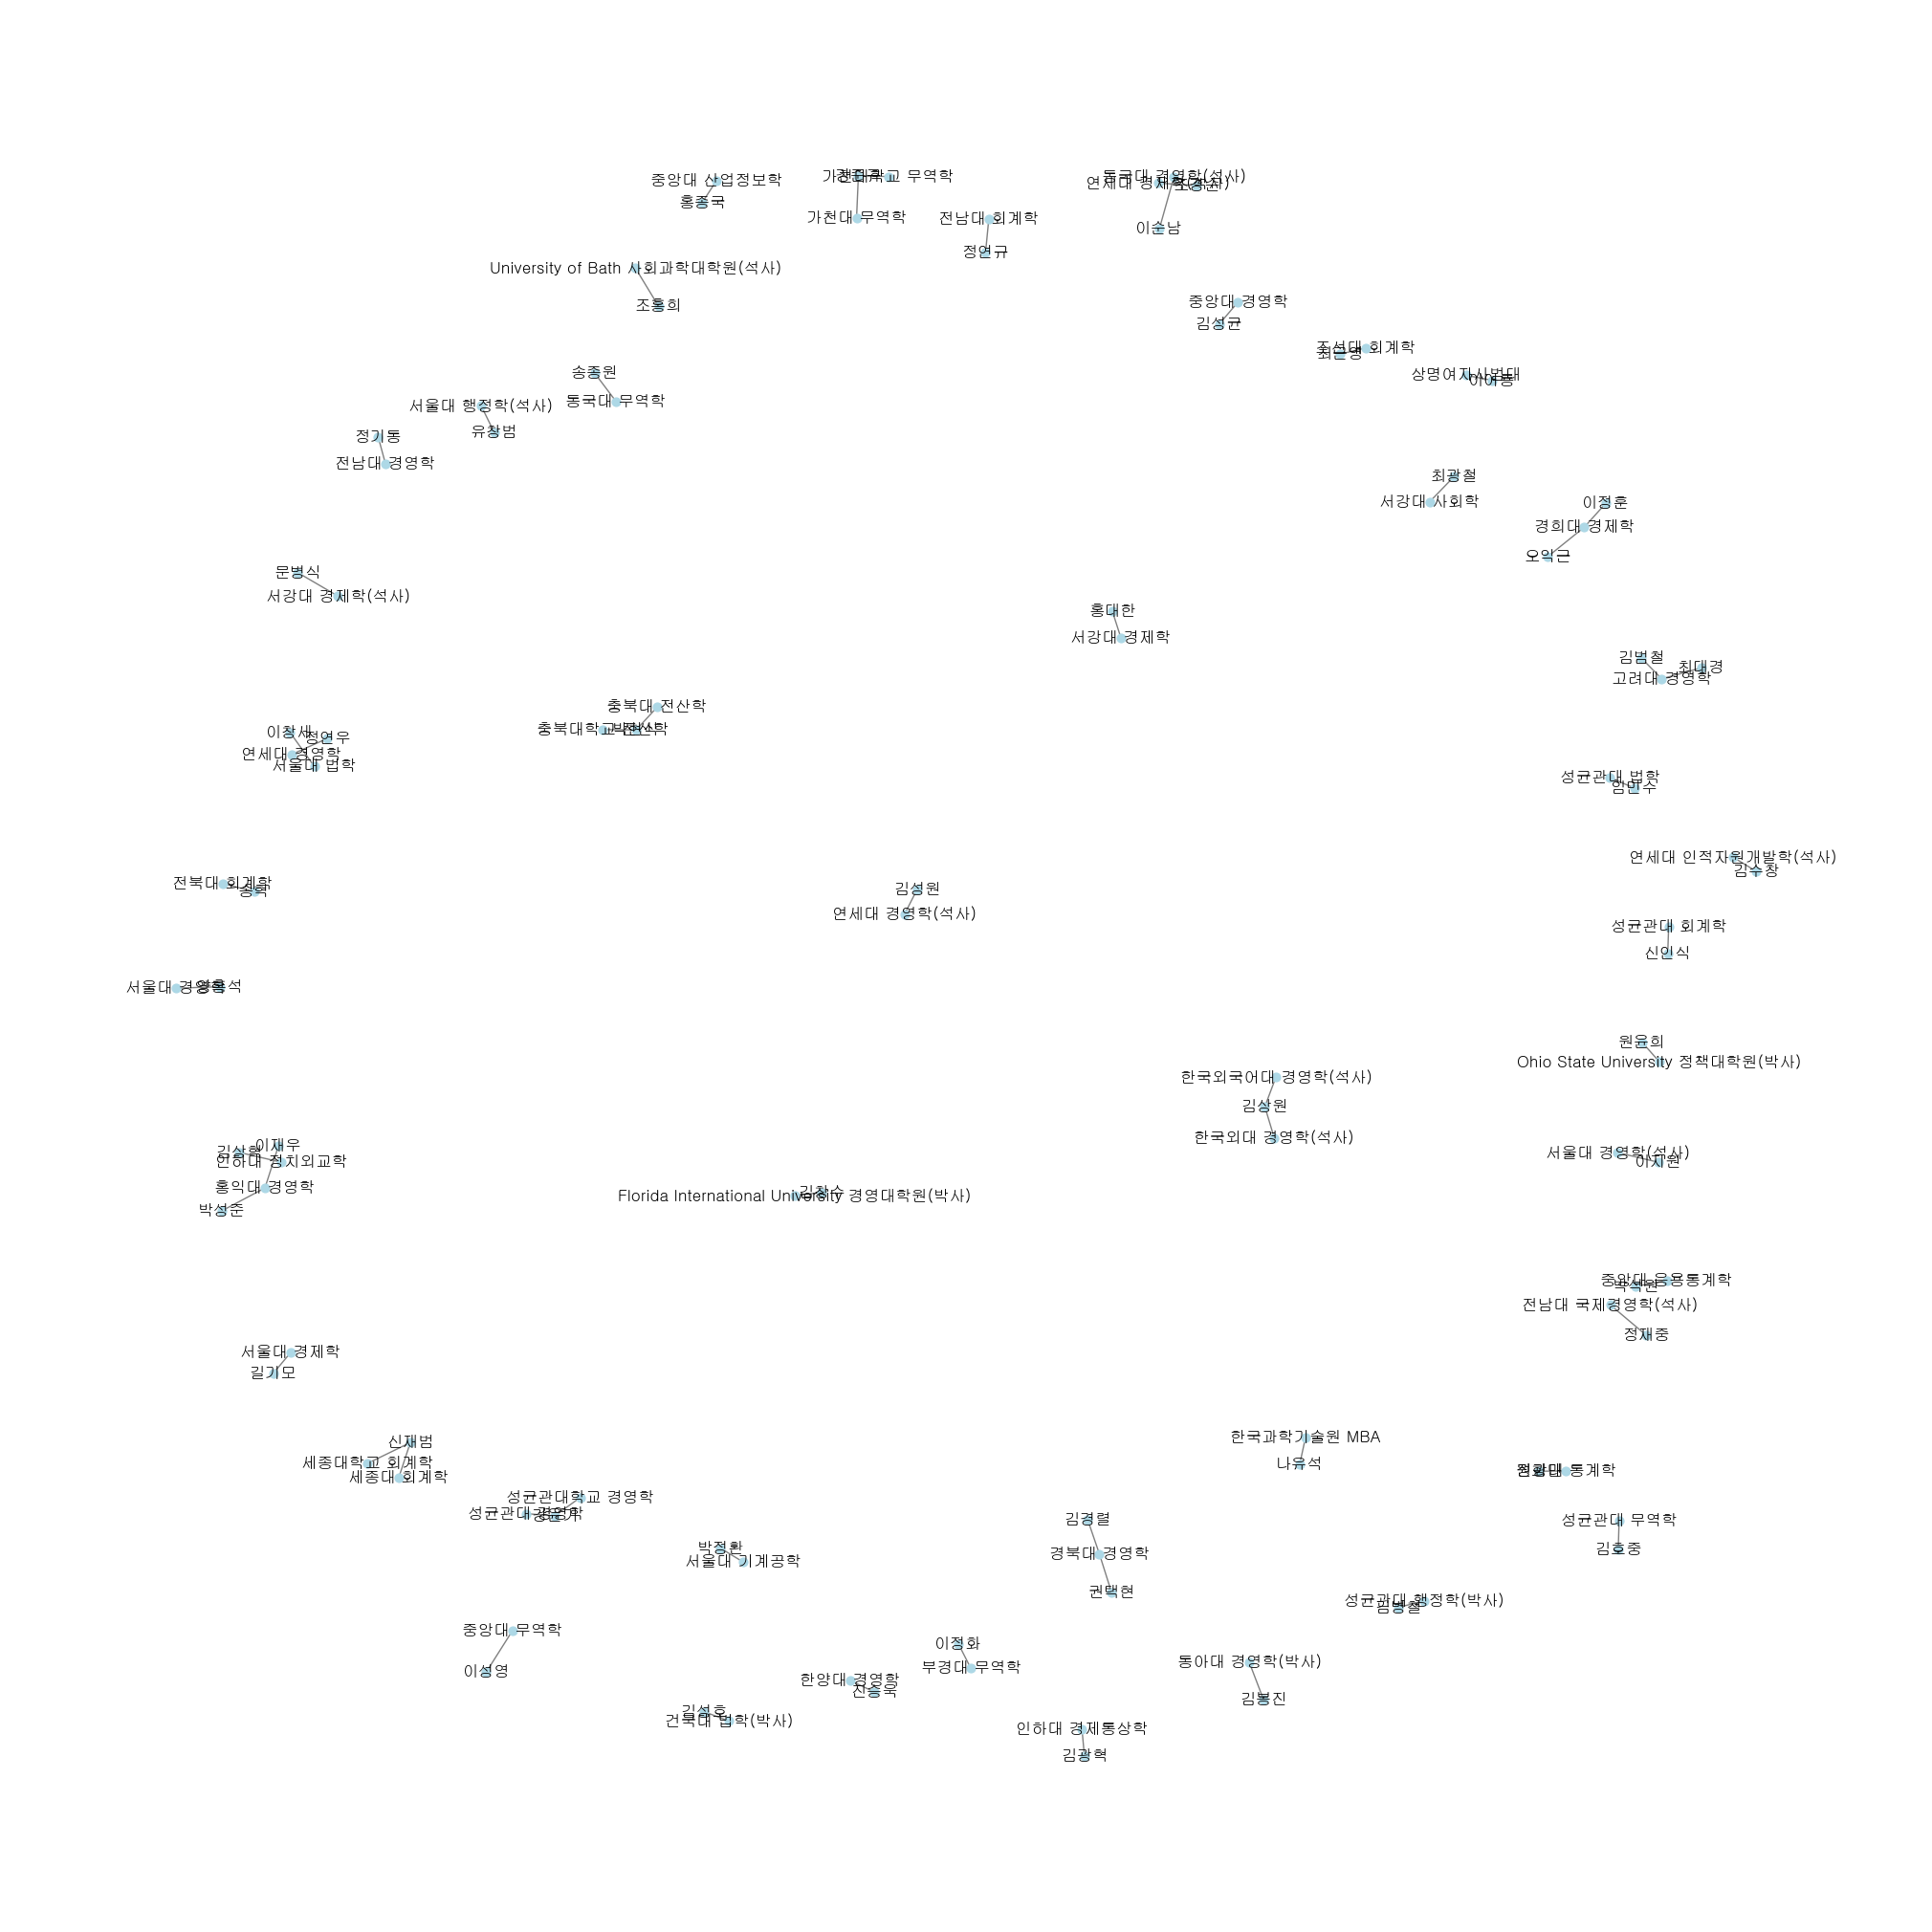

In [28]:
G_Education = nx.Graph()
G_Education = nx.from_pandas_edgelist(daishin_executive, source = '이름', target = '학력')
# print(nx.info(G_Education))

plt.figure(figsize=(20, 20))
nx.draw(G_Education, with_labels=True, node_size=40, node_color='lightblue', edge_color='gray', font_family='gulim')
plt.show()

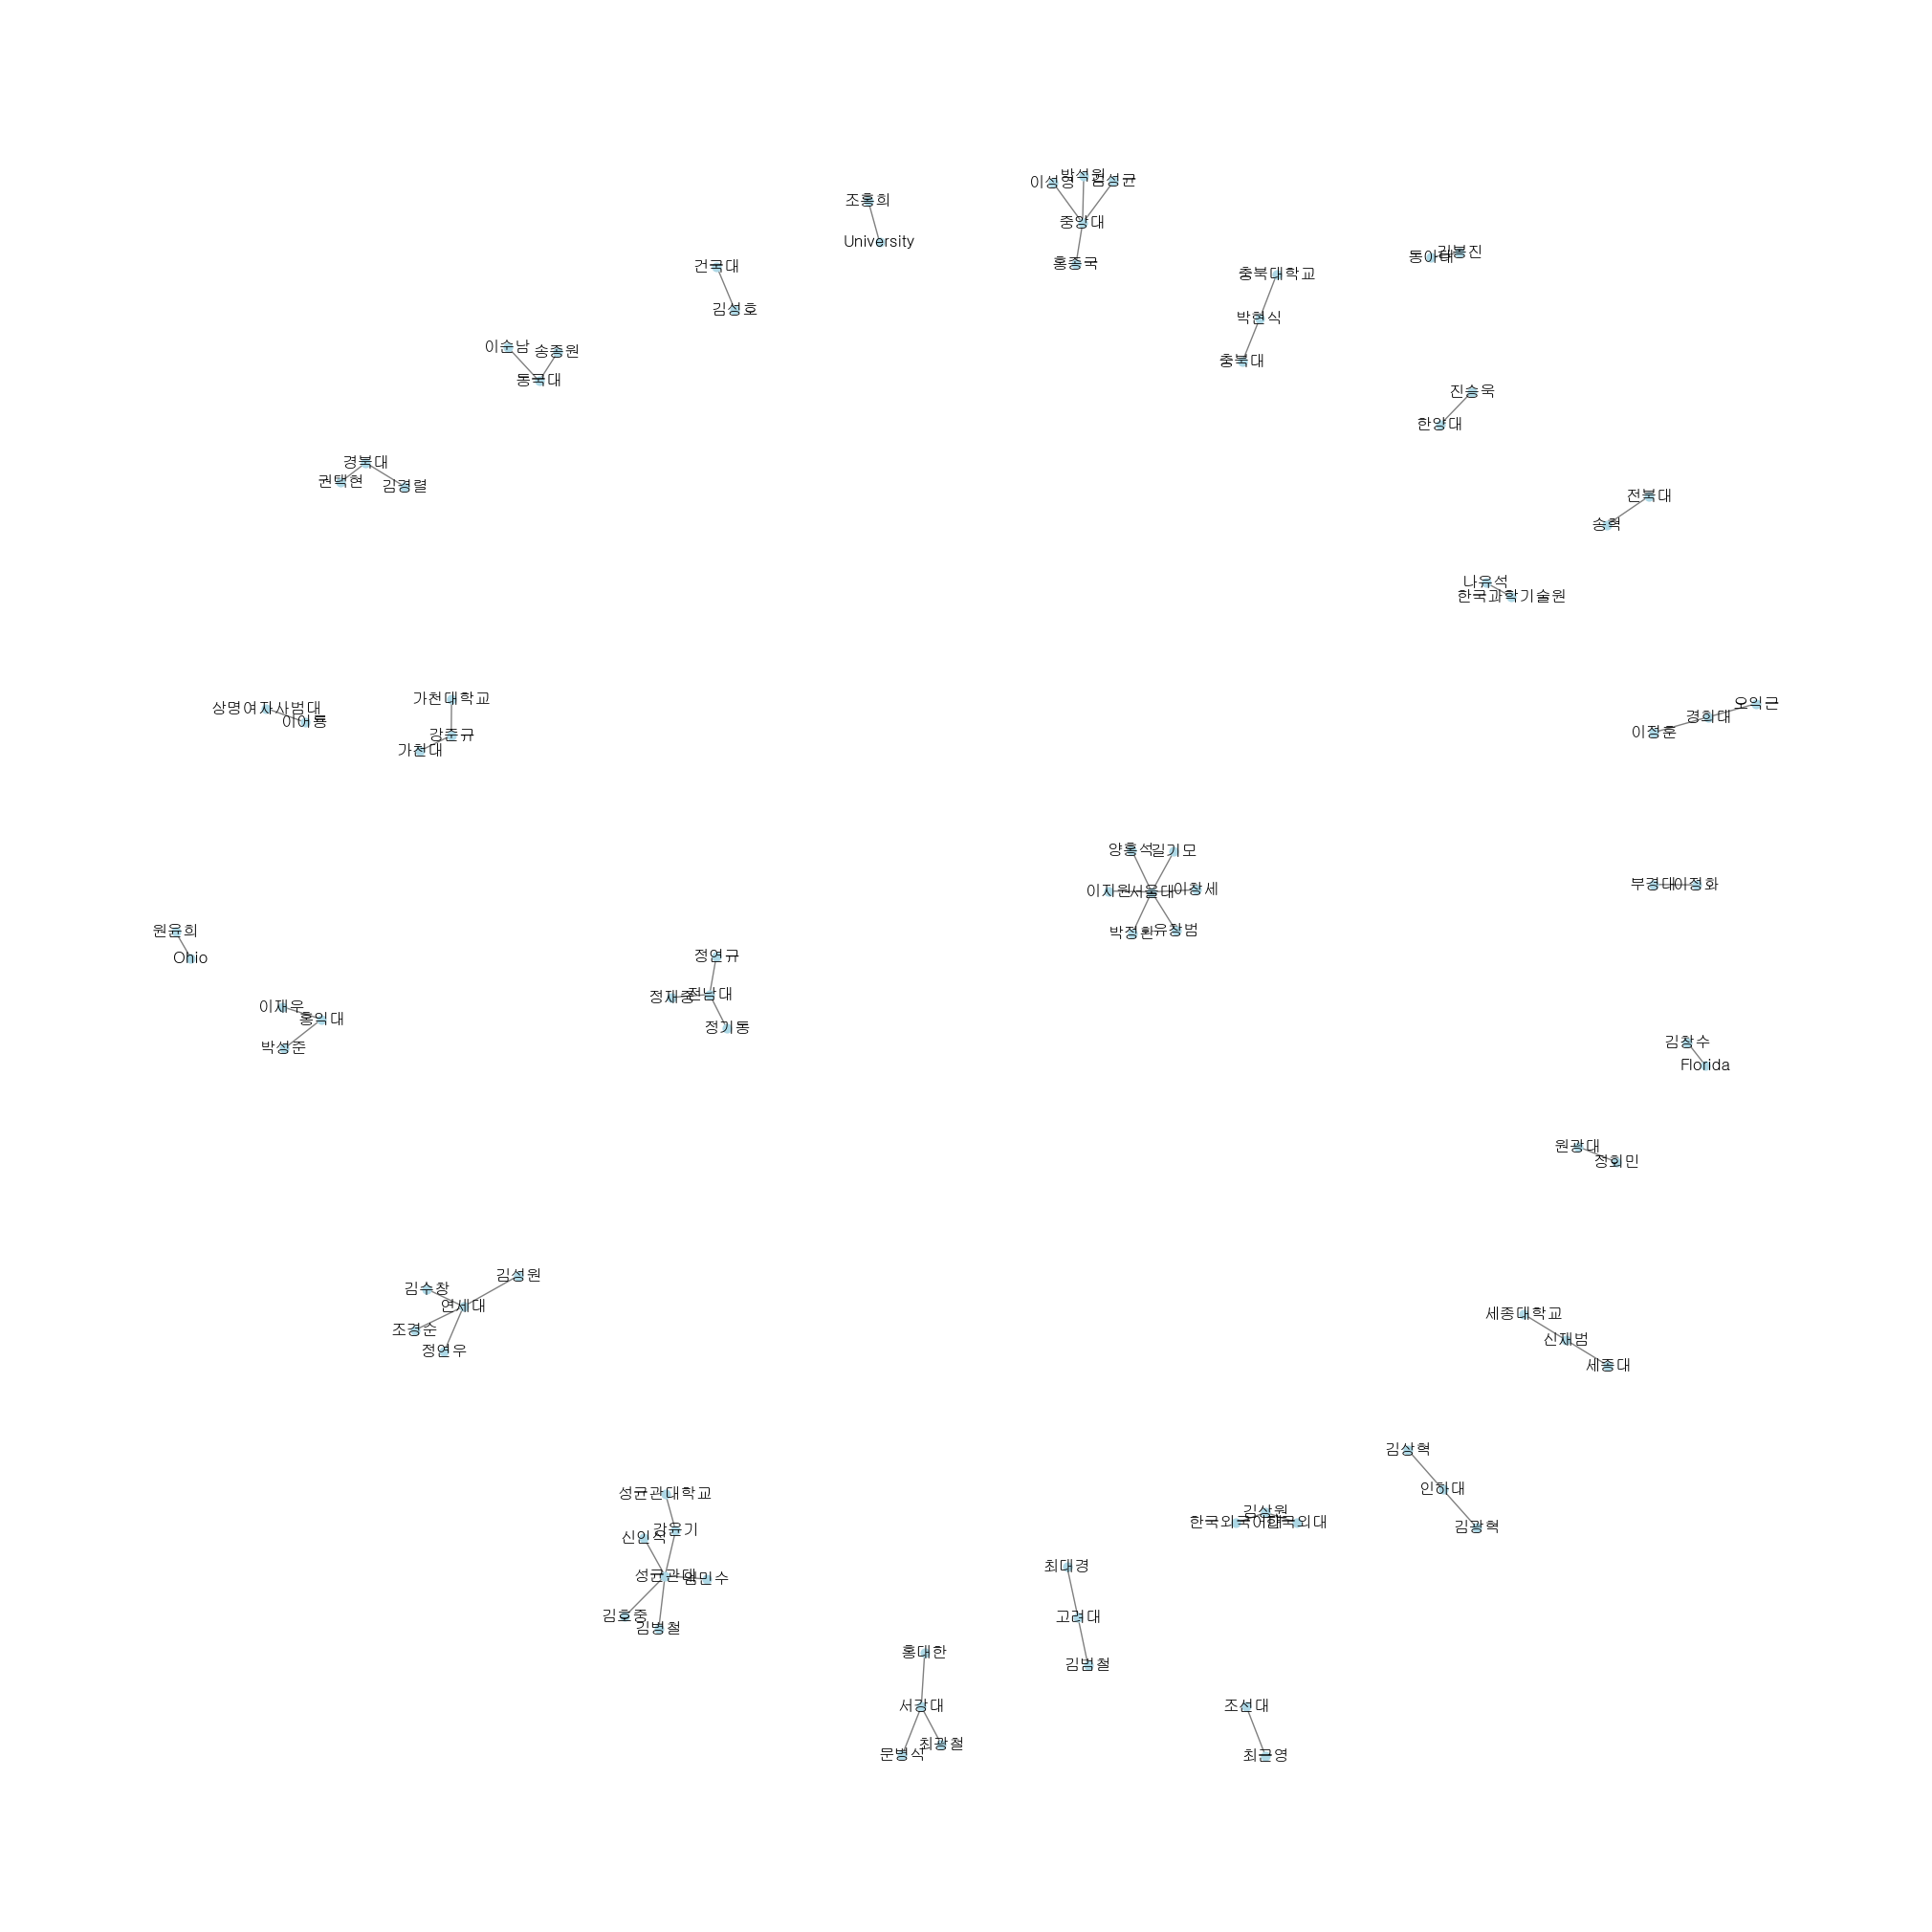

In [29]:
G_University = nx.Graph()
G_University = nx.from_pandas_edgelist(daishin_executive, source = '이름', target = '대학')
# print(nx.info(G_University))

plt.figure(figsize=(20, 20))
nx.draw(G_University, with_labels=True, node_size=40, node_color='lightblue', edge_color='gray', font_family='gulim')
plt.show()

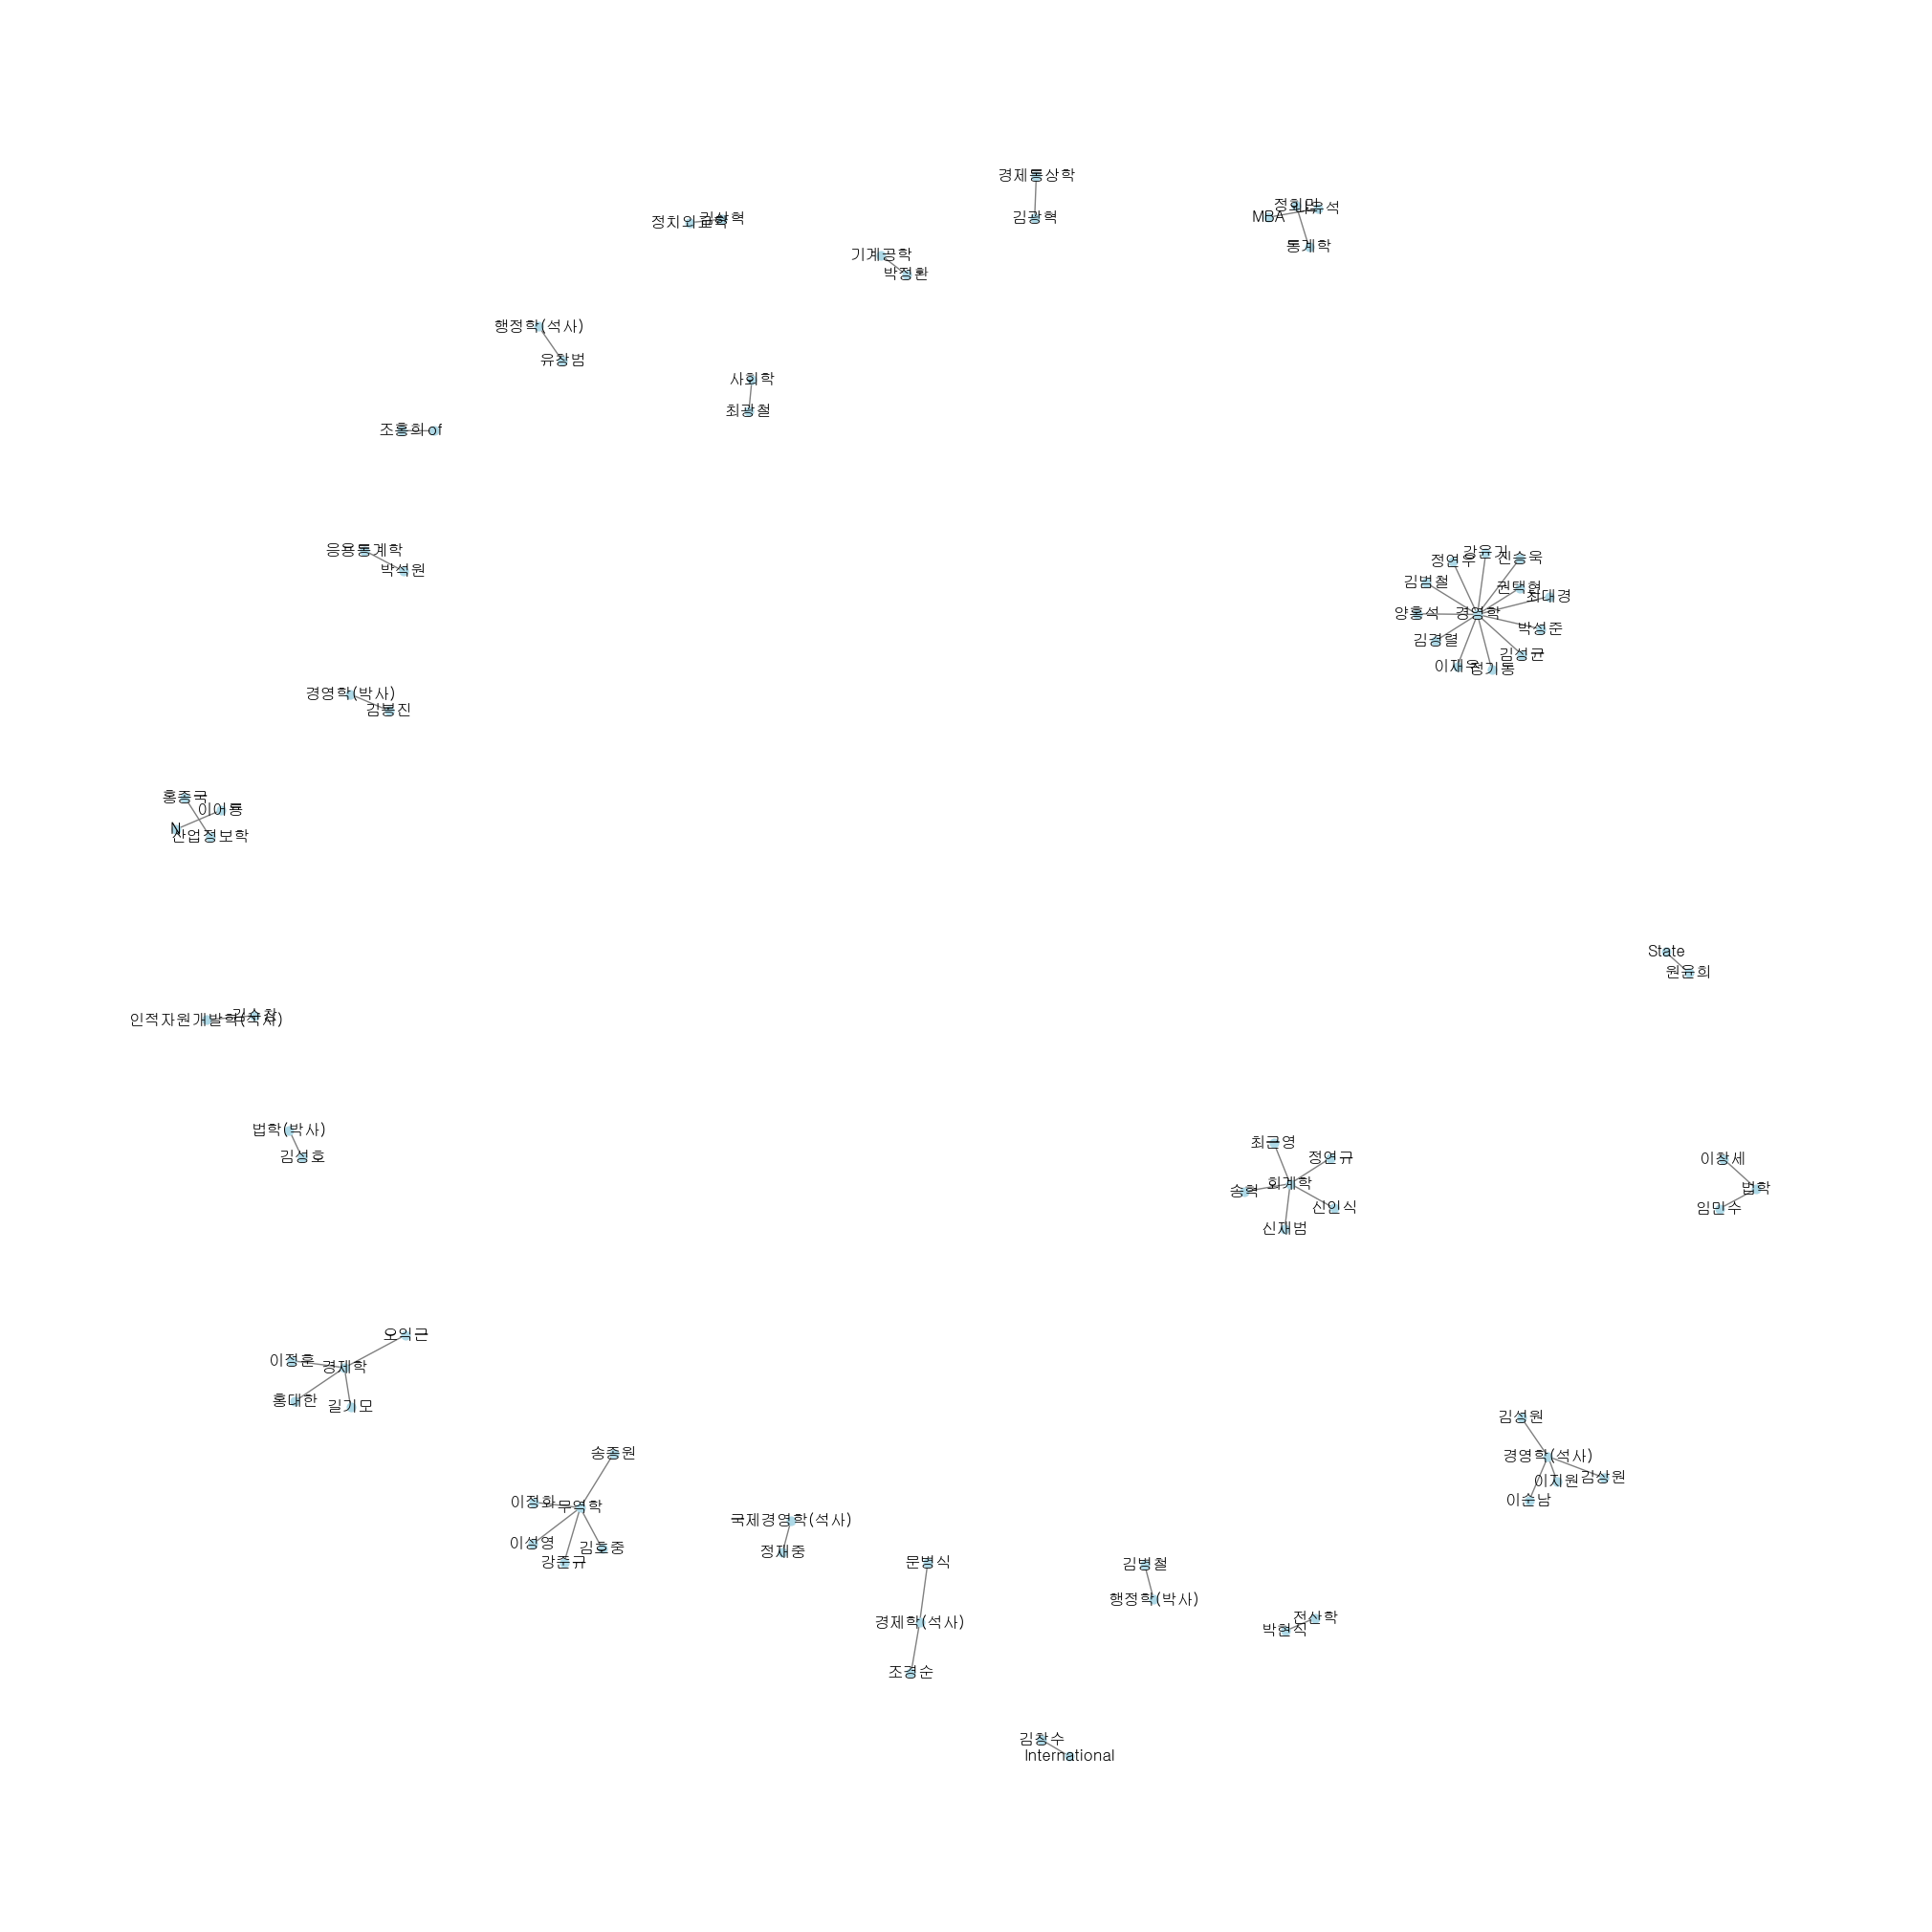

In [30]:
G_Major = nx.Graph()
G_Major = nx.from_pandas_edgelist(daishin_executive, source = '이름', target = '전공')
# print(nx.info(G_Major))

plt.figure(figsize=(20, 20))
nx.draw(G_Major, with_labels=True, node_size=40, node_color='lightblue', edge_color='gray', font_family='gulim')
plt.show()

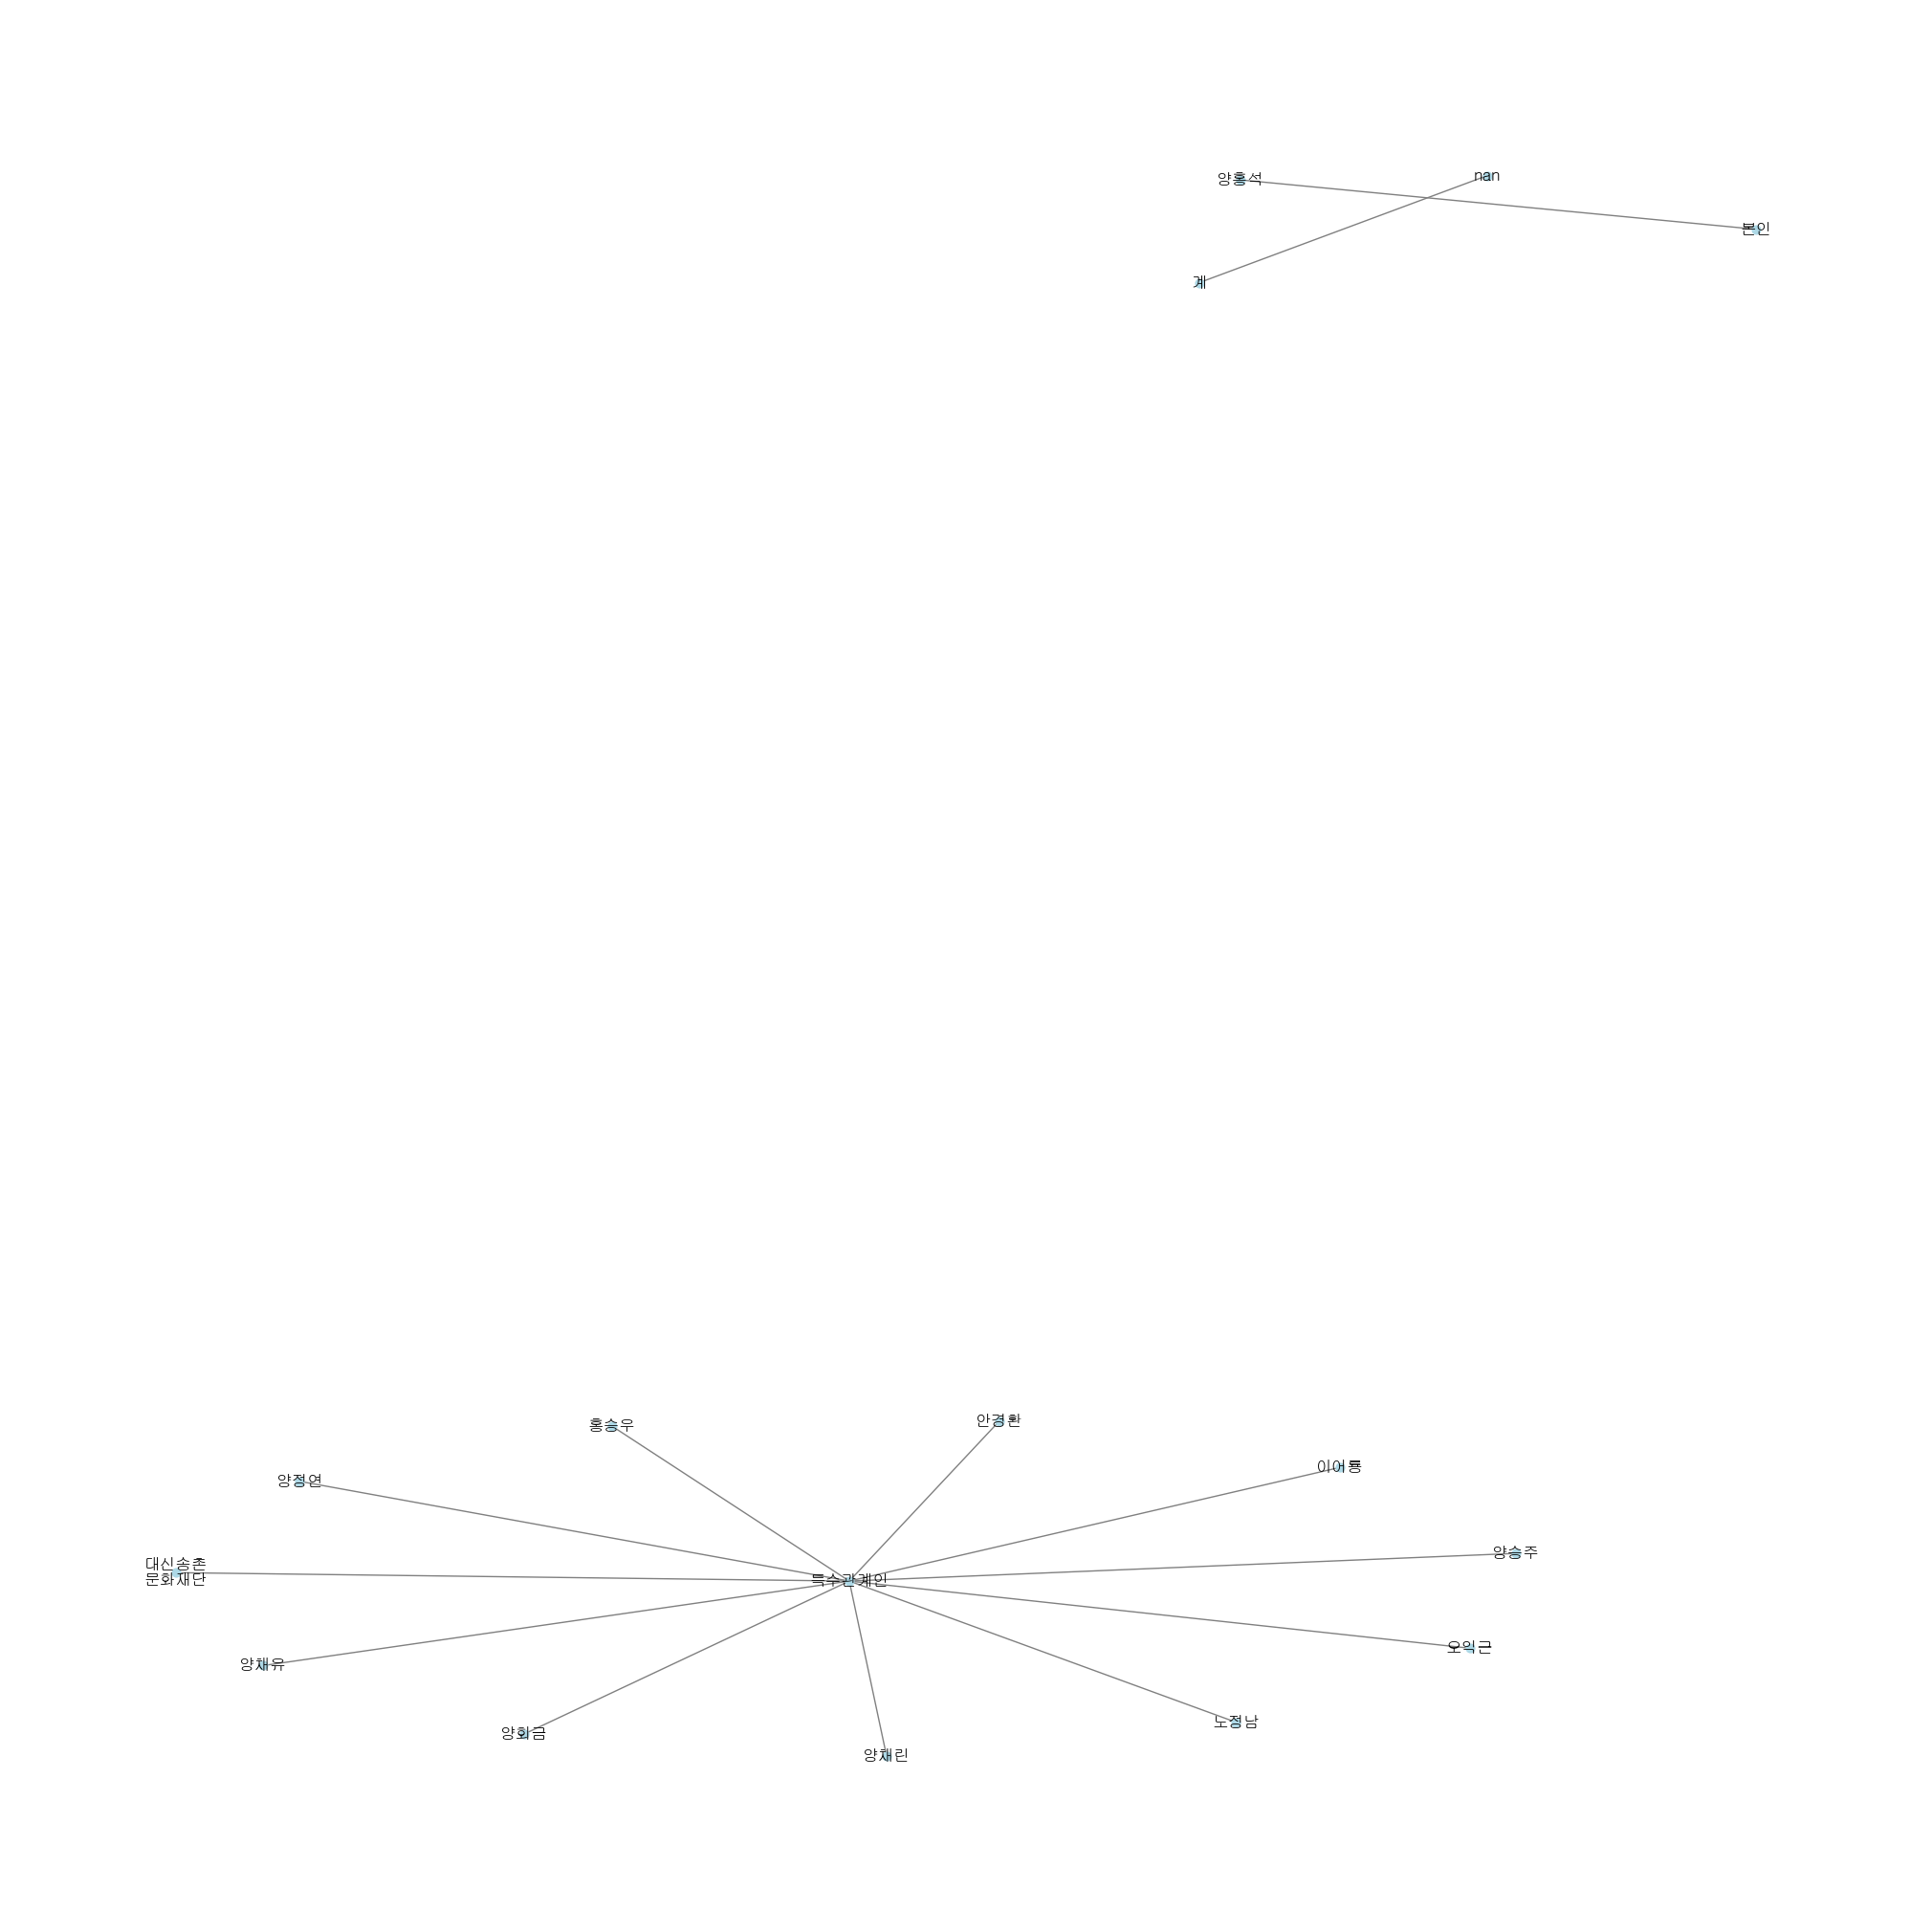

In [31]:
G_Relationship = nx.Graph()
G_Relationship = nx.from_pandas_edgelist(daishin_shareholder, source = '이름', target = '관계')
# print(nx.info(G_Relationship))

plt.figure(figsize=(20, 20))
nx.draw(G_Relationship, with_labels=True, node_size=40, node_color='lightblue', edge_color='gray', font_family='gulim')
plt.show()